In [1]:
#Import Libraries
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Load the data
data = pd.read_csv('heart.csv')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
#Checking missing values
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
#Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#Summary
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

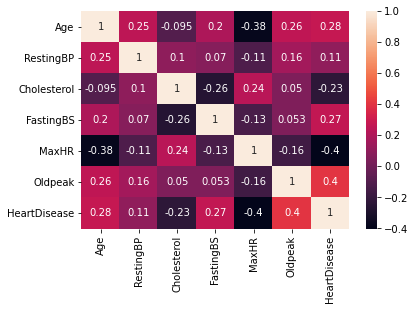

In [6]:
#Checking correlation
data.corr()
sns.heatmap(data.corr(),annot=True)

In [7]:
data['Sex'].head()

0    M
1    F
2    M
3    F
4    M
Name: Sex, dtype: object

In [8]:
#Label encoding (Converting Categorical into Numerical values)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex']).astype('int')
data['ChestPainType'] = le.fit_transform(data['ChestPainType']).astype('int')
data['RestingECG'] = le.fit_transform(data['RestingECG']).astype('int')
data['ExerciseAngina'] = le.fit_transform(data['ExerciseAngina']).astype('int')
data['ST_Slope'] = le.fit_transform(data['ST_Slope']).astype('int')

In [9]:
#Assignning independent and dependent variables
x = data.iloc[:,0:11]
y = data.iloc[:,-1:]

In [10]:
#Split the data for training and testing
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [20]:
#Scale the values
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_train = std.fit_transform(xtrain)
x_test = std.transform(xtest)

# Logistic Regression

In [21]:
#Build the model by using Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,ytrain)

LogisticRegression()

In [22]:
#Predictions
ypred = log_reg.predict(x_test)

In [23]:
#Metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc = accuracy_score(ytest,ypred)
print("Accuracy :",acc);print()
cm = confusion_matrix(ytest,ypred)
print("Confusion Matrix :\n",cm);print()
cls = classification_report(ytest,ypred)
print("Classification Refort :\n",cls)

Accuracy : 0.8804347826086957

Confusion Matrix :
 [[ 60  12]
 [ 10 102]]

Classification Refort :
               precision    recall  f1-score   support

           0       0.86      0.83      0.85        72
           1       0.89      0.91      0.90       112

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# Decision Tree

In [24]:
#Build the model by using Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision_tree= DecisionTreeClassifier()
decision_tree.fit(x_train,ytrain)

DecisionTreeClassifier()

In [25]:
#Predictions
yhat = decision_tree.predict(x_test)

In [27]:
#Metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc1 = accuracy_score(ytest,yhat)
print("Accuracy :",acc1);print()
cm1 = confusion_matrix(ytest,yhat)
print("Confusion Matrix :\n",cm1);print()
cls1 = classification_report(ytest,yhat)
print("Classification Refort :\n",cls1)

Accuracy : 0.75

Confusion Matrix :
 [[56 16]
 [30 82]]

Classification Refort :
               precision    recall  f1-score   support

           0       0.65      0.78      0.71        72
           1       0.84      0.73      0.78       112

    accuracy                           0.75       184
   macro avg       0.74      0.75      0.74       184
weighted avg       0.76      0.75      0.75       184



# Random Forest

In [29]:
#Build the model by using random forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier()
random_forest.fit(x_train,ytrain)

RandomForestClassifier()

In [30]:
#Predictions
yhat1 = random_forest.predict(x_test)

In [31]:
#Metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
acc2 = accuracy_score(ytest,yhat1)
print("Accuracy :",acc2);print()
cm2 = confusion_matrix(ytest,yhat1)
print("Confusion Matrix :\n",cm2);print()
cls2 = classification_report(ytest,yhat1)
print("Classification Refort :\n",cls2)

Accuracy : 0.8804347826086957

Confusion Matrix :
 [[ 61  11]
 [ 11 101]]

Classification Refort :
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        72
           1       0.90      0.90      0.90       112

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



# Observations:
Performeed different models on given dataset and concluded that **LOGISTIC REGRESSION** is the best model among all. 

Got Accuracy : 88% , Recall : 91% , Precision : 89%